# Midterm 1

**Brian Roepke**
**DATA 110**

February 21, 2021

Perform a complete analysis on the dataset attached, including full EDA, data prep/cleansing, modeling/performance assessment and analysis annotation/description. Make sure to format your notebook accordingly with section headers and text, as part of your grade is based on the format of your notebook.

## Load the dataset and describe the data including the following:

* Peek at the data
* Statistical summary of all attributes
* Breakdown of the data by  variables

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, plot_confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.model_selection import cross_val_score, train_test_split, KFold, RepeatedStratifiedKFold
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier, LocalOutlierFactor
from sklearn.svm import LinearSVC
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("bank.csv", delimiter=";")

In [3]:
df.shape

(4521, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Numerical Data

In [5]:
# get numerical data only
numeric_data = df.select_dtypes(include=['int64'])
numeric_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       4521 non-null   int64
 1   balance   4521 non-null   int64
 2   day       4521 non-null   int64
 3   duration  4521 non-null   int64
 4   campaign  4521 non-null   int64
 5   pdays     4521 non-null   int64
 6   previous  4521 non-null   int64
dtypes: int64(7)
memory usage: 247.4 KB


### Categorical Data

In [6]:
# get categorical data
cat_data = df.select_dtypes(include=['object'])

cat_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   job        4521 non-null   object
 1   marital    4521 non-null   object
 2   education  4521 non-null   object
 3   default    4521 non-null   object
 4   housing    4521 non-null   object
 5   loan       4521 non-null   object
 6   contact    4521 non-null   object
 7   month      4521 non-null   object
 8   poutcome   4521 non-null   object
 9   y          4521 non-null   object
dtypes: object(10)
memory usage: 353.3+ KB


In [7]:
# show counts values of each categorical variable
for colname in cat_data.columns:
    print (colname)
    print (cat_data[colname].value_counts(), '\n')

job
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64 

marital
married     2797
single      1196
divorced     528
Name: marital, dtype: int64 

education
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64 

default
no     4445
yes      76
Name: default, dtype: int64 

housing
yes    2559
no     1962
Name: housing, dtype: int64 

loan
no     3830
yes     691
Name: loan, dtype: int64 

contact
cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64 

month
may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64 

poutcome
unknown    3705
failure     490
other       197
success 

### Check for Null Values

In [8]:
# check for nan/null
df.isnull().values.any()

False

In [9]:
# count of nulls
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Note:** There are no duplicate values

### Remove Duplicates

In [ ]:
# drop duplicates
len(df.drop_duplicates())

In [ ]:
df.shape

**Note:** There are no duplicate values

### Show Head and Tail

In [ ]:
df.head()

In [ ]:
df.tail()

### Statistical Summary of all Attributes

Including a Breakdown of the data by the class variable.

In [ ]:
df.describe().round(2)

**Observations**  
 - **Age**: Values range from `19` to `87` years old with a mean of `41`.  These values seem logical.
 - **Balance**: Balances range from `-$3,313` to `$71,188`.  This also makes sense.  People can have negative balances (overdrawn) and also potentially have large savings. However, the mean savings are only `$263` with a standard deviation of `$259`, telling us that most people's savings values are in the lower range.
 - **day**: This is a numeric representation of the day of the month, values ranging from 1-31`.
 - **duration**: duration is the length of the last contact in seconds.  If this value is `0`, then the dependent variable y will be `no`.  There are no values of `0` in this dataset.  The min is `4` seconds, max of `3025` seconds or `50.4` hours.  It doesn't seem possible that there was a call over two days.  The 75% quartile value is `329` seconds or `5.5` minutes.
 - **campaign**: The number of contacts to the customer during the campaign. They are ranging from `1` to `50` with a mean of `2.79`. 
 - **pdays**: Number of days that passed since the last contact.  Values from `-1` to `871` or `2.38` years.  This is plausible since banking relationships can last decades.  `999` means the client was not previously contacted (there are no values with this number. However, there is a massive number with the `-1` value.  This is most likely representing no prior contact.
 - **previous**: Number of contacts to the customer before this campaign started.  Values were ranging from `0` (new customer / first campaign) to `25`.

In [ ]:
cat_data.describe()

## Visualizations 
Univariate and Multivariate plots

### Distributions

In [ ]:
df.plot(figsize=(15,10), kind='density', subplots=True, layout=(3,3), sharex=False);

**Density Plots:**  
With the excpetion of age, and day (which we saw in the descriptive statistics), all of the other variables show high concentrations of values around the mean, and significant outliers. These will be examined later to see how they should be treated in the dataset. 

One plot we can look at with a little more detail, **age**.

In [ ]:
plt.figure(figsize=(6,5))
sns.histplot(x='age', data=df);

**Age:** The age distribution shows a right skewed distribution with more values falling into the younger ages.

**Age:** The age distribution shows a right skewed distribution with more values falling into the younger ages.

### Outlier Analysis

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [ ]:
# using seaborn library, plot each individually
fig, axes = plt.subplots(3, 2, figsize=(14,14))

ax = sns.boxplot(x="y", y="age", data=df, ax=axes[0, 0], palette='tab20')
ax = sns.boxplot(x="y", y="balance", data=df, ax=axes[0, 1], palette='tab20')
ax = sns.boxplot(x="y", y="duration", data=df, ax=axes[1, 0], palette='tab20')
ax = sns.boxplot(x="y", y="campaign", data=df, ax=axes[1, 1], palette='tab20')
ax = sns.boxplot(x="y", y="pdays", data=df, ax=axes[2, 0], palette='tab20')
ax = sns.boxplot(x="y", y="previous", data=df, ax=axes[2, 1], palette='tab20')

**Note**: Plotting `Boxplots` for each of the non-categorical values shows that each of the values does have a significant amout of outliers displayed. Let's see how many are present.

Using a method of counting outliers that fall outside of `+/- 3` standard deviations mean that we are accounting for `99.7%` of all data in this data set.

In [ ]:
# Function to print the number of outliers in a column.
def get_outliers(outl):
    '''Function to identify the number of outliers +/- 3 standar deviations outside of mean.
    Pass this function a Pandas Series (column)'''
    print('Series Name:', outl.name)
    # calculate summary statistics
    data_mean, data_std = np.mean(outl), np.std(outl)
    # identify outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in outl if x < lower or x > upper]
    print('Identified outliers: %d' % len(outliers))
    # remove outliers
    outliers_removed = [x for x in outl if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))
    print()

In [ ]:
get_outliers(df['age'])
get_outliers(df['balance'])
get_outliers(df['duration'])
get_outliers(df['campaign'])
get_outliers(df['pdays'])
get_outliers(df['previous'])

**Conclusion on Outliers:**  
There are outliers in this dataset, some make sense, like the large `balance` value and some make less sense such as `duration` having a multi-day phone call.  We will take care of these in the **training** portion of our ML Modeling to ensure their bias isn't introduced.

**Note**: *This is opposed to removing them before train-test split.  The values might be useful in the overal predictions, specifically regarding the test data set.*

### Multivariate Plots

Starting with Pair-wise plots to see if there are any obvious relationships in the data.

In [ ]:
# Using seaborn, pairwise plot by y

g=sns.pairplot(df, diag_kind = 'auto', hue="y")
g.fig.set_size_inches(12,12);

# rotate labels
for ax in g.axes.flatten():
    # rotate y axis labels
    ax.set_ylabel(ax.get_ylabel(), rotation = 0)
    # set y labels alignment
    ax.yaxis.get_label().set_horizontalalignment('right')

**Observations:** 

Upon comparing all numeric variables against each other, it's not clear if there are any obvious relationships between variables (positive or negative correlations).  We can test this next to be sure.

In [ ]:
# using seaboarn to plot correlation heat map
corr = df.corr()

f, ax = plt.subplots(figsize=(12, 8))

sns.heatmap(corr, cmap="Blues", annot=True, square=False, ax=ax,  linewidth = 1)
plt.title('Pearson Correlation of Features')
plt.yticks(rotation=45);

**Observations:**  
After running a Pearson's Correlation on the numeric values, there is not a strong corrrelation between variables.  The strongest is `previous` vs. `pdays` at `0.58`.  As a reminder `previous` is the number of contacts to the customer in prior marketing campaigns, and `pdays` is the number of days since last contact in this campaign.

### Demographic Plots

In [ ]:
sns.displot(
    data=df,
    x="age", hue="marital",
    kind="kde", height=6,
    multiple="fill", clip=(0, None),
    palette="tab20",
);

**Age / Marital Status:** When plotting `Marital` status over age on a density estimate plot, the `single` population tends to be younger, as expected, with `married` growing in population.  `Divorced` also grows with age but is a smaller proportion of the total.

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(x='age', data=df, hue='education', multiple='stack', palette="tab20");

**Age/Education:** There are relativley few people in the dataset that have an `unknown` education level, The rest of the values are somewhat evenly distributed across ages, with `secondary` school being the largest proportion.

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x="education", y="balance", data=df, palette="tab20")

**Eduacation/Balance:** People with `unknown` and `tertiary` levels of education tend to have slightly higher savings.  Those with secondary tend to have the lowest balance.

In [ ]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x="job", y="balance", data=df, palette="tab20")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

**Job/Balance:** Across the various jobs, `housemade` and `retired` are the leading savers.  On the other spectrum, `blue-collar`, `services` and `unemployed` have the lowest.

## Create Prediction Model: 

**Desired Outcome**: Create a model that will predict if the client will subscribe (yes/no) a term deposit (variable y)
Assess model performance

### Feature Selection

**Chi-Squared Feature Selection**

Pearson’s chi-squared statistical hypothesis test is an example of a test for independence between categorical variables.

The results of this test can be used for feature selection, where those features that are independent of the target variable can be removed from the dataset.

The scikit-learn machine library provides an implementation of the chi-squared test in the chi2() function. This function can be used in a feature selection strategy, such as selecting the top k most relevant features (largest values) via the SelectKBest class.

For example, we can define the SelectKBest class to use the chi2() function and select all features, then transform the train and test sets.

https://machinelearningmastery.com/feature-selection-with-categorical-data/

In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [11]:
oe = OrdinalEncoder(handle_unknown='ignore')
oe.fit(X)
X = oe.transform(X)

In [12]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [13]:
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

* age: 49.431167
* job: 11.679248
* marital: 0.248626
* education: 3.339391
* default: 0.039239
* balance: 10511.322122
* housing: 11.788867
* loan: 12.889637
* contact: 64.864792
* day: 15.358145
* month: 4.102635
* duration: 80409.534986
* campaign: 39.986529
* pdays: 5324.229354
* previous: 302.895548
* poutcome: 10.921719



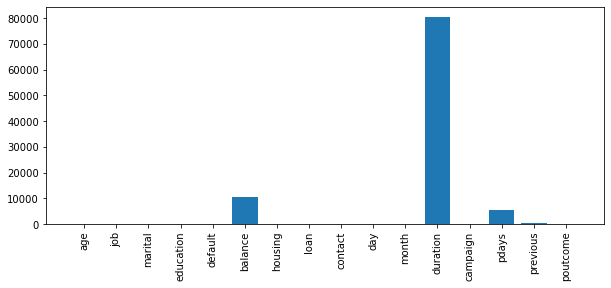

In [15]:
# what are scores for the features
names = []
values = []
for i in range(len(fs.scores_)):
    print('* %s: %f' % (df.columns[i], fs.scores_[i]))
    names.append(df.columns[i])
    values.append(fs.scores_[i])
print()
chi_list = zip(names, values)
# plot the scores
plt.figure(figsize=(10,4))
plt.bar(names, values)
plt.xticks(rotation = 90)
plt.show()

**Results:**  Based on the bar plot, we can see that `contact` has the strongest contribution followed by `job`, `housing`, `loan`, and `poutcome`.  We can take these into consideration when building the model, but we can also try to see the prediction with all variables. 

### Variable Encoding

**Note**: None of the variables appear to be Ordinal, e.g. have a natural order to them.  The Education field could be, but isn't critical to the analysis.  Therefore, a simple encoding of each level will be used with values of `0-n`. 

In [16]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]
X = X.values
y = y.values

In [17]:
ohe = OneHotEncoder(handle_unknown='ignore')
print('X Train: original:', X.shape)
ohe.fit(X)

X Train: original: (4521, 16)


OneHotEncoder(handle_unknown='ignore')

In [18]:
X = ohe.transform(X).toarray()
print('X Train: one-hot-encoded:', X.shape)

X Train: one-hot-encoded: (4521, 3718)


In [19]:
enc = LabelEncoder()
enc.fit(y)
y = enc.transform(y)

**One Hot Encoding:** After encoding the features as binary `1/0` values for each, we can see that the number of columns as expanded from `16` to `3,718`.  This increases the dimensionality of the dataset, but make handling the categorical variables consistent and represented by a numeric value. 

### Adjusting for Imbalanced Data
>Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance. The challenge is that most ML techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.
There are various approaches to handling unbalanced datasets. One approach is Synthetic Minority Oversampling Technique (SMOTE).
Here new examples are synthesized from the existing examples. This is a type of data augmentation for the minority class referred to as the *Synthetic Minority Oversampling Technique*, or **SMOTE** for short.

https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

In [20]:
from imblearn.over_sampling import SMOTE

print('before balancing')
print(y.shape )

oversample = SMOTE()
X_bal, y_bal = oversample.fit_resample(X, y)

print ('\nafter balancing')
print(y_bal.shape)

before balancing
(4521,)

after balancing
(8000,)


In [21]:
# Reduce the set of data, only to the model we'll train against.
X = X_bal
y = y_bal

In [22]:
print(X.shape)
print(y.shape)

(8000, 3718)
(8000,)


**Note on Balancing**:  
Prior to the balancing process you can see that the number of `0` observations is `4,000` and the number of `1` observations is `521`, a nearly 8x delta in values.  After the *Synthetic Minority Oversampling* is completed, there are an even number of observations at `4,000` each.

### Model Selection
Run the reduced feature set across a number of different models, and find the one with the best score.

The process will start by reducing the our X-independent variables down to the selected `12` features from the above process.  This way we do not have to do feature selection again for each algorithm but can run a number of them to determine best performance.  A number of classifiers will be used and the best one will be selected.

https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
# get a list of models to evaluate
def get_models():
    models = dict()
    # Decision Tree
    models['DTree'] = DecisionTreeClassifier(random_state=42)
    models['RandForest'] = RandomForestClassifier(random_state=42)
    models['Extra'] = ExtraTreesClassifier(random_state=42)
    models['GradBoost'] = GradientBoostingClassifier(random_state=42)
    models['AdaBoost'] = AdaBoostClassifier(random_state=42)  
    models['LinearSVG'] = LinearSVC(random_state=42)  
    models['SGD'] = SGDClassifier(random_state=42) 
    models['NN'] = KNeighborsClassifier(3)
    models['RidgeCV'] = RidgeClassifierCV()
    models['Perceptron'] = Perceptron(random_state=42)
    return models

# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('* %s %.3f (%.3f)' % (name, np.mean(scores), np.std(scores)))

# plot model performance for comparison
plt.figure(figsize=(10,8))
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

**Conclusion for Model:**  
The `ExtraTreesClassifier` algorithm peformed the best out of the above choices with a mean score of `0.936` and a standard deviation of `0.008`.

### Adjusting for Outliers

> The expectation is that the outliers are causing the model to learn a bias or skewed understanding of the problem, and that removing these outliers from the training set will allow a more effective model to be learned.
We can achieve this by defining the [LocalOutlierFactor](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html) model and using it to make a prediction on the training dataset, marking each row in the training dataset as normal (1) or an outlier (-1). We will use the default hyperparameters for the outlier detection model, although it is a good idea to tune the configuration to the specifics of your dataset.

https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/

In [23]:
# Split the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

In [24]:
train_before = len(X_train)
print("Training Size:", train_before)
print("Test Size:",len(X_test))

Training Size: 5360
Test Size: 2640


In [25]:
# identify outliers in the training dataset
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [26]:
mask = yhat != -1
X_train, y_train = X_train[mask, :], y_train[mask]
# summarize the shape of the updated training dataset
train_after = len(X_train)
print("Training Size:", train_after)
print("Test Size:",len(X_test))
print()
print("Number of Outliers Removed:", train_before - train_after)

Training Size: 5360
Test Size: 2640

Number of Outliers Removed: 0


**Note:** After the processing of the categorical values in the dataset with `OneHotEncoding`, there are no longer any significant outliers to worry about.

### Model Training

In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train);

In [28]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

## Model Evaluation

### Classification Report & Confusion Matrix

              precision    recall  f1-score   support

           0      0.947     0.992     0.969      1318
           1      0.991     0.945     0.967      1322

    accuracy                          0.968      2640
   macro avg      0.969     0.968     0.968      2640
weighted avg      0.969     0.968     0.968      2640



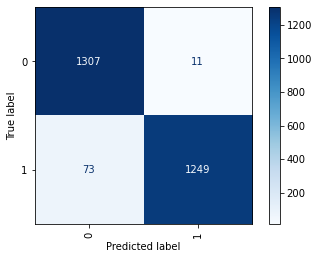

In [29]:
# print accuracy report
print(classification_report(y_test, y_pred, digits=3))

# show confusion matrix
plot_confusion_matrix(model, X_test, y_test,
                      xticks_rotation='vertical',
                      cmap=plt.cm.Blues)  
plt.show()

**Results:**
After Adjusting for Imbalaced data with `SMOTE`, Feature Selection, Cross Validationm Model Selection, Removing Outliers, the `RandomForestClassifier` performed with a precision of `0.994` for the value of `1`, or those customers that subscribed to a term deposit.

### ROC AUC
ROC curve (receiver operating characteristic curve) is a plot that summarizes the performance of a binary classification model on the positive class. It's a popular diagnostic tool for classifiers on balanced and imbalanced binary prediction problems as it's not biased to the majority or minority class.
is a plot of False Positive Rate (x-axis) vs True Positive Rate (y-axis) for a number of different candidate threshold values between 0.0 and 1.0. The true positive rate is referred to as the sensitivity or the recall.

 - **X-axis**: False Positive Rate=FP/(FP+TN)
 - **Y-axis**: True Positive Rate=TP/(TP+FN)

Plot the ROC curve and choose a threshold that gives a desirable balance between the false positives and false negatives.  

Ideally, we want the fraction of correct positive class predictions to be 1 (top of the plot) and the fraction of incorrect negative class predictions to be 0 (left of the plot). 

The best possible classifier achieving perfect result is the top-left at coordinate: (0,1)
the threshold is applied to the probability cut-off point between the positive and negative classes (by default set at 0.5, halfway between each (0 and 1)

https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

In [ ]:
yhat = model.predict_proba(X_test) # predict only probability of 1.
pos_probs = yhat [:, 1] # probabilities for just the positive class

# plot no skill roc curve
plt.plot([0, 1], [0, 1], linestyle='--', label='No Skill')

fpr, tpr, _ = roc_curve(y_test, pos_probs) # calculate roc curve for model

# plot model roc curve
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**ROC AUC Observations:**  
Based on the shape of the curve, starting from `0,0` and extending to `0,1` with a slight elbow and then extending to `1,1`, this shape represents a very strong performance of our model.

Next we can calculate the actual ROC AUC Score

In [ ]:
# no skill model, stratified random class predictions
np.random.seed(1)
m = DummyClassifier(strategy='stratified', random_state=42)
m.fit(X_train, y_train)
no_skill_yhat = m.predict_proba(y_test)
no_skill_roc_auc = roc_auc_score(y_test, no_skill_yhat[:, 1])
print(f'No Skill ROC AUC {round(no_skill_roc_auc, 3)}')

# skilled model
roc_auc = roc_auc_score(y_test, pos_probs)
print(f'Random Forest ROC AUC {round(roc_auc, 4)}')

**Score:**
The score for our model is `0.9843`, which is just under the perfect value of `1.0`.

### Precision-Recall

Precision-Recall Curves and AUC

Precision is a metric that quantifies the number of correct positive predictions made.

It is calculated as the number of true positives divided by the total number of true positives and false positives.

 - **Precision** = TruePositives / (TruePositives + FalsePositives)

The result is a value between 0.0 for no precision and 1.0 for full or perfect precision.

Recall is a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made.

It is calculated as the number of true positives divided by the total number of true positives and false negatives (e.g. it is the true positive rate).

 - **Recall** = TruePositives / (TruePositives + FalseNegatives)

The result is a value between 0.0 for no recall and 1.0 for full or perfect recall.

Both the precision and the recall are focused on the positive class (the minority class) and are unconcerned with the true negatives (majority class).

A precision-recall curve (or PR Curve) is a plot of the precision (y-axis) and the recall (x-axis) for different probability thresholds.

 - **PR Curve:** Plot of Recall (x) vs Precision (y).
 
A model with perfect skill is depicted as a point at a coordinate of (1,1). A skillful model is represented by a curve that bows towards a coordinate of (1,1). A no-skill classifier will be a horizontal line on the plot with a precision that is proportional to the number of positive examples in the dataset. For a balanced dataset this will be 0.5.

The focus of the PR curve on the minority class makes it an effective diagnostic for imbalanced binary classification models.

In [ ]:
# calculate the baseline as the proportion of the positive class
no_skill = len(y[y==1]) / len(y)

# plot the no skill precision-recall curve
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')

# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, pos_probs)

# plot the model precision-recall curve
plt.plot(recall, precision, label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
# no skill model, stratified random class predictions
precision, recall, _ = precision_recall_curve(y_test, no_skill_yhat[:, 1])
auc_score = auc(recall, precision)
print(f'No Skill PR AUC: {round(auc_score, 3)}')

# skilled model
precision, recall, _ = precision_recall_curve( y_test, pos_probs)
auc_score = auc(recall, precision)
print(f'Random Forest PR AUC: {round(auc_score, 4)}')

**Precision-Recall:**  

Our final PR Score of `0.9811` is close to the perfect skill score of `1.0`.

## Conclusion

## Kaggle

Using a Pipeline to complete the full process and predict on new data

https://machinelearningmastery.com/columntransformer-for-numerical-and-categorical-data/

https://datascience.stackexchange.com/questions/54052/obtaining-consistent-one-hot-encoding-of-train-production-data

In [ ]:
df = pd.read_csv("bank.csv", delimiter=";")

In [ ]:
X = df.iloc[:, :-1]
y = df.y

In [ ]:
X.shape

In [ ]:
enc = LabelEncoder()
enc.fit(y)
y = enc.transform(y)

In [ ]:
cat_x = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
nums_x = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [ ]:
t = [('cats', OneHotEncoder(), cat_x)]
col_transform = ColumnTransformer(transformers=t)

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
# define the data preparation and modeling pipeline
pipeline = Pipeline(steps=[('prep',col_transform), ('m', model)])

In [ ]:
# define the model cross-validation configuration
cv = KFold(n_splits=10, shuffle=True, random_state=1)

In [ ]:
# evaluate the pipeline using cross validation and calculate MAE
scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
# convert MAE scores to positive values
scores = np.absolute(scores)

In [ ]:
# summarize the model performance
print('MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [ ]:
scores

In [ ]:
pipeline.fit(X,y)

In [30]:
ka = pd.read_csv("test.csv")

In [31]:
ka.drop(columns=['Id'], inplace=True)

In [36]:
# check for nan/null
ka.isnull().values.any()

False

In [34]:
ka.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [35]:
X = ohe.transform(ka).toarray()

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
enc = LabelEncoder()
enc.fit(y)
y = enc.transform(y)

In [ ]:
col_trans = make_column_transformer(
    (OneHotEncoder(), cat_x),
    remainder='passthrough')

In [ ]:
col_trans_cats.fit_transform(X)

In [ ]:
pipe = make_pipeline(col_trans_cat ,model)

In [ ]:
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')
print('X Train: original:', X.shape)
ohe.fit(X)

In [ ]:
X = ohe.transform(X).toarray()
print('X Train: one-hot-encoded:', X.shape)

In [ ]:
X = X.values
y = y.values

In [ ]:
X

In [ ]:
ohe = OneHotEncoder(handle_unknown='ignore')

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
pipeline = Pipeline(steps=[('ohe',ohe),('rf',model)])
#pipeline = Pipeline(steps=[('ohe',ohe)])
# fit the model on all available data

In [ ]:
pipeline.fit(X,y)

In [ ]:
# Split the dataset into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, random_state=42)

In [ ]:
y_pred = pipeline.predict(X_test)

In [ ]:
y_pred